In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

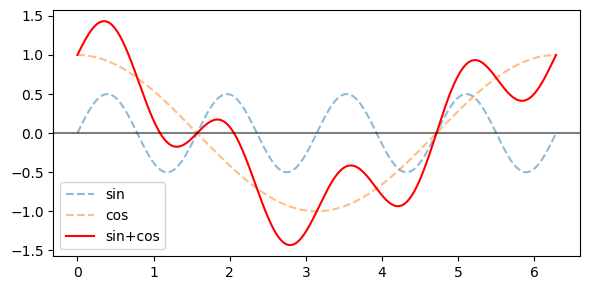

In [2]:
x = np.linspace(0, 2*np.pi, 1000)
y1 = 0.5*np.sin(4*x)
y2 = np.cos(x)
y = y1 + y2

plt.figure(figsize=(6, 3))
plt.plot(x, y1, label='sin', alpha=0.5, ls='--')
plt.plot(x, y2, label='cos', alpha=0.5, ls='--')
plt.plot(x, y, label='sin+cos', color='red')
plt.axhline(0, color='black', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

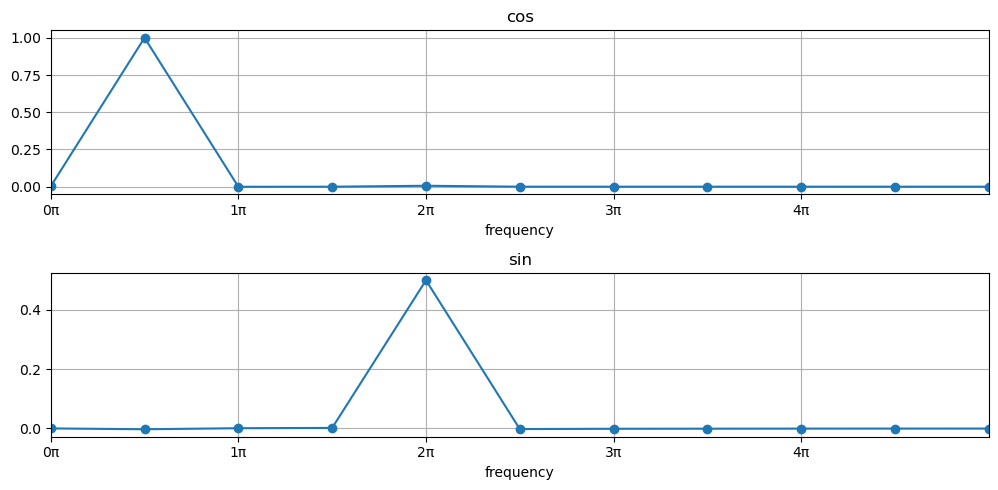

In [3]:
# サンプリングサイズ
N = len(x)
# 実フーリエ変換
f = np.fft.rfft(y) * (2/N)
# 周波数軸のリスト
freq = np.fft.rfftfreq(len(x), d=2*np.pi/len(x))

# グラフ表示
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(freq*np.pi, f.real, marker='o')
plt.xticks(range(5), labels=[f'{i}π' for i in range(5)])
plt.xlim(0, 5)
plt.title('cos')
plt.xlabel('frequency')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(freq*np.pi, -f.imag, marker='o')
plt.xticks(range(5), labels=[f'{i}π' for i in range(5)])
plt.xlim(0, 5)
plt.title('sin')
plt.xlabel('frequency')
plt.grid()
plt.tight_layout()
plt.show()

In [4]:
df = pd.read_csv(os.path.join(os.getcwd(),'data','local-pressure.csv'), encoding='shift-jis', skiprows=3)
df.columns = ['datetime', 'pres']
df['datetime'] = pd.to_datetime(df['datetime'])

print(df.shape)
print(df['datetime'].min(), '\n-->', df['datetime'].max())
df.head()

(8784, 2)
2022-11-26 01:00:00 
--> 2023-11-27 00:00:00


,datetime,pres
0,2022-11-26 01:00:00,1013.0
1,2022-11-26 02:00:00,1012.4
2,2022-11-26 03:00:00,1011.8
3,2022-11-26 04:00:00,1011.1
4,2022-11-26 05:00:00,1011.0


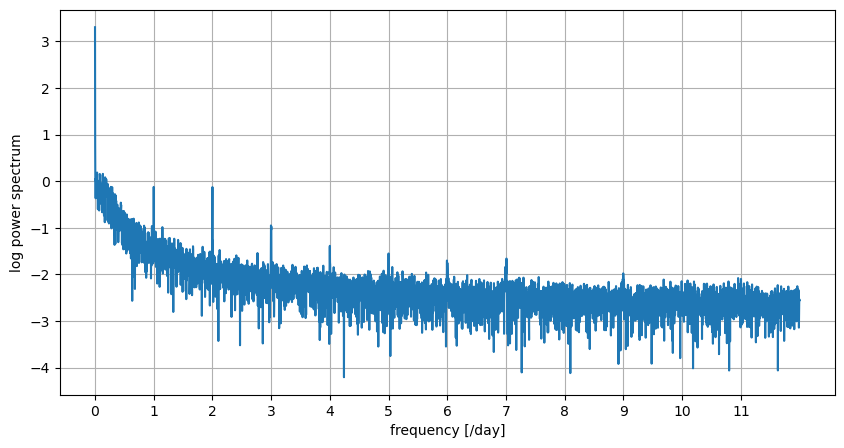

In [5]:
# サンプリング数
N = len(df['pres'])

# 実フーリエ変換
F = np.fft.rfft(df['pres']) * (2/N)

# 周波数軸の値を計算
freq = np.fft.rfftfreq(N, d=1/24)  # 1day当たり24サンプル

# 周波数スペクトルの複素数を絶対値に変換
F_abs = np.abs(F)
# 見やすいように常用対数に変換
F_log = np.log10(F_abs)

# グラフ表示
plt.figure(figsize=(10, 5))
plt.plot(freq, F_log)
plt.xticks(np.arange(0, 12))
plt.xlabel('frequency [/day]')
plt.ylabel('log power spectrum')
plt.grid()
plt.show()